# Skin Cancer Detection

Joydip Basu Biswas

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator

# Data Augmentation

Train Data

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip= True)

Test Data

In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)

# Import our Data set and Split into Training set and Test set

Training_set

In [4]:
training_set = train_datagen.flow_from_directory('E:/Deep Learning/Part 2 - Convolutional Neural Networks/Skin_cancer/data/train',
                                                 target_size=(120,120),
                                                 batch_size=32,
                                                 class_mode='binary')

Found 2637 images belonging to 2 classes.



Test_set

In [5]:
test_set = test_datagen.flow_from_directory('E:/Deep Learning/Part 2 - Convolutional Neural Networks/Skin_cancer/data/test',
                                            target_size=(120,120),
                                            batch_size=32,
                                            class_mode='binary')

Found 660 images belonging to 2 classes.


# Model Building

# CNN

 used the Keras Sequential API, where I have just to add one layer at a time, starting from the input.

The first is the convolutional (Conv2D) layer. It is like a set of learnable filters. I choosed to set 32 filters for the two firsts conv2D layers. Each filter transforms a part of the image (defined by the kernel size) using the kernel filter. The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.

The CNN can isolate features that are useful everywhere from these transformed images (feature maps).

The second important layer in CNN is the pooling (MaxPool2D) layer. This layer simply acts as a downsampling filter. It looks at the 2 neighboring pixels and picks the maximal value. These are used to reduce computational cost, and to some extent also reduce overfitting. We have to choose the pooling size (i.e the area size pooled each time) more the pooling dimension is high, more the downsampling is important.

Combining convolutional and pooling layers, CNN are able to combine local features and learn more global features of the image.


'relu' is the rectifier (activation function max(0,x). The rectifier activation function is used to add non linearity to the network.

The Flatten layer is use to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers. It combines all the found local features of the previous convolutional layers.

In the end I used the features in one fully-connected (Dense) layer which is just artificial an neural networks (ANN) classifier.

In [6]:
classifier = Sequential()

classifier.add(Convolution2D(32, 3, 3, input_shape=(120,120,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add(Convolution2D(32, 3, 3, activation = "relu"))
classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = "relu"))
classifier.add(Dropout(rate = 0.2))
classifier.add(Dense(units = 1, activation = "sigmoid"))

classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

# Fitting Data into Model

In [7]:
history = classifier.fit(training_set,
               steps_per_epoch=2637 // 32, 
               epochs=100,
               validation_data=test_set, 
               validation_steps=660 // 32)


Epoch 1/100
82/82 [==============================] - 21s 253ms/step - loss: 0.6272 - accuracy: 0.6280 - val_loss: 0.5479 - val_accuracy: 0.7406
Epoch 2/100
82/82 [==============================] - 20s 239ms/step - loss: 0.4914 - accuracy: 0.7597 - val_loss: 0.4330 - val_accuracy: 0.7875
Epoch 3/100
82/82 [==============================] - 22s 272ms/step - loss: 0.4270 - accuracy: 0.7908 - val_loss: 0.4229 - val_accuracy: 0.7953
Epoch 4/100
82/82 [==============================] - 29s 353ms/step - loss: 0.4134 - accuracy: 0.7965 - val_loss: 0.4187 - val_accuracy: 0.7953
Epoch 5/100
82/82 [==============================] - 24s 289ms/step - loss: 0.4390 - accuracy: 0.7800 - val_loss: 0.4095 - val_accuracy: 0.7828
Epoch 6/100
82/82 [==============================] - 19s 229ms/step - loss: 0.4101 - accuracy: 0.8008 - val_loss: 0.3966 - val_accuracy: 0.7984
Epoch 7/100
82/82 [==============================] - 27s 335ms/step - loss: 0.3975 - accuracy: 0.8061 - val_loss: 0.4043 - val_accuracy:

82/82 [==============================] - 19s 233ms/step - loss: 0.2838 - accuracy: 0.8702 - val_loss: 0.3497 - val_accuracy: 0.8266
Epoch 58/100
82/82 [==============================] - 19s 226ms/step - loss: 0.2667 - accuracy: 0.8664 - val_loss: 0.3168 - val_accuracy: 0.8562
Epoch 59/100
82/82 [==============================] - 20s 248ms/step - loss: 0.2806 - accuracy: 0.8633 - val_loss: 0.3285 - val_accuracy: 0.8562
Epoch 60/100
82/82 [==============================] - 21s 257ms/step - loss: 0.2651 - accuracy: 0.8779 - val_loss: 0.3364 - val_accuracy: 0.8516
Epoch 61/100
82/82 [==============================] - 20s 247ms/step - loss: 0.2679 - accuracy: 0.8779 - val_loss: 0.3166 - val_accuracy: 0.8625
Epoch 62/100
82/82 [==============================] - 21s 260ms/step - loss: 0.2673 - accuracy: 0.8761 - val_loss: 0.3089 - val_accuracy: 0.8547
Epoch 63/100
82/82 [==============================] - 21s 256ms/step - loss: 0.2601 - accuracy: 0.8821 - val_loss: 0.3196 - val_accuracy: 0.857

List all data in history

In [8]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Summarize history for accuracy

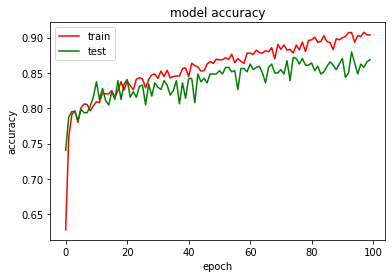

In [12]:
plt.plot(history.history['accuracy'], color = "red")
plt.plot(history.history['val_accuracy'], color = "green")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarize history for loss

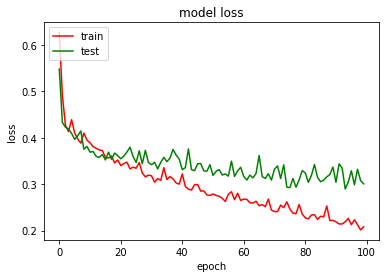

In [13]:
plt.plot(history.history['loss'], color = "red")
plt.plot(history.history['val_loss'], color = "green")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Prediction

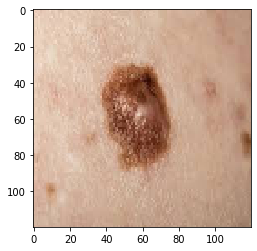

'Malignant'

In [14]:
test_image = image.load_img('E:\Deep Learning\Part 2 - Convolutional Neural Networks\Skin_cancer\data\Prediction/skin_1.jpg', target_size=(120,120))
plt.imshow(test_image)
plt.show()
test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image,axis=0)
training_set.class_indices

result = classifier.predict(test_image)

if result [0][0] == 1:
    prediction = 'Malignant'
else:
    prediction ='Benign'

prediction


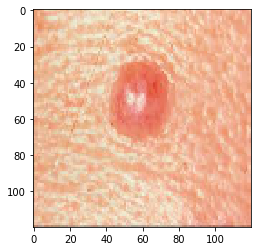

'Benign'

In [15]:
test_image = image.load_img('E:\Deep Learning\Part 2 - Convolutional Neural Networks\Skin_cancer\data\Prediction/skin_2.jpg', target_size=(120,120))
plt.imshow(test_image)
plt.show()

test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image,axis=0)
training_set.class_indices

result = classifier.predict(test_image)

if result [0][0] == 1:
    prediction = 'Malignant'
else:
    prediction ='Benign'


prediction

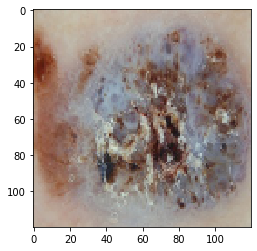

'Malignant'

In [16]:
test_image = image.load_img('E:\Deep Learning\Part 2 - Convolutional Neural Networks\Skin_cancer\data\Prediction/skin_3.jpg', target_size=(120,120))
plt.imshow(test_image)
plt.show()

test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image,axis=0)
training_set.class_indices

result = classifier.predict(test_image)

if result [0][0] == 1:
    prediction = 'Malignant'
else:
    prediction ='Benign'


prediction

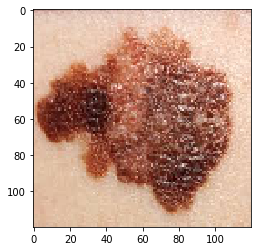

'Malignant'

In [17]:
test_image = image.load_img('E:\Deep Learning\Part 2 - Convolutional Neural Networks\Skin_cancer\data\Prediction/skin_4.jpg', target_size=(120,120))
plt.imshow(test_image)
plt.show()

test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image,axis=0)
training_set.class_indices

result = classifier.predict(test_image)

if result [0][0] == 1:
    prediction = 'Malignant'
else:
    prediction ='Benign'


prediction

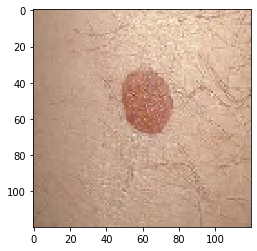

'Benign'

In [18]:
test_image = image.load_img('E:\Deep Learning\Part 2 - Convolutional Neural Networks\Skin_cancer\data\Prediction/skin_5.jpg', target_size=(120,120))
plt.imshow(test_image)
plt.show()

test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image,axis=0)
training_set.class_indices

result = classifier.predict(test_image)

if result [0][0] == 1:
    prediction = 'Malignant'
else:
    prediction ='Benign'


prediction